<a href="https://colab.research.google.com/github/ssfatemi/DL-ML-Tutorial/blob/main/ML-python/3-Gradient_Descent/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent algorithm

## Tutorial

In [2]:
import numpy as np
import matplotlib.pyplot as plt




In [28]:
%matplotlib inline

def gradient_descent(x,y,iteration):
    m_curr = b_curr = 0
    rate = 0.01
    n = len(x)
    plt.scatter(x,y,color='red',marker='+')
    for i in range(iteration):
        y_predicted = m_curr * x + b_curr
#         print (m_curr,b_curr, i)
        plt.plot(x,y_predicted,color='green',linewidth='1')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd

In [40]:
%matplotlib inline

def gradient_descent_changingrate(x,y,iteration,start_rate):
    m_curr = b_curr = 0
    rate = start_rate
    n = len(x)
    plt.scatter(x,y,color='red',marker='+')
    for i in range(iteration):
        y_predicted = m_curr * x + b_curr
#         print (m_curr,b_curr, i)
        plt.plot(x,y_predicted,color=(0,1/(iteration-i),0),linewidth='1')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd

        rate = rate/(i+1)

In [21]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

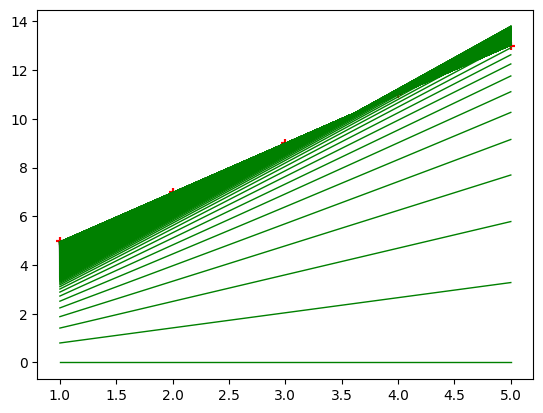

In [29]:
gradient_descent(x,y,1000)

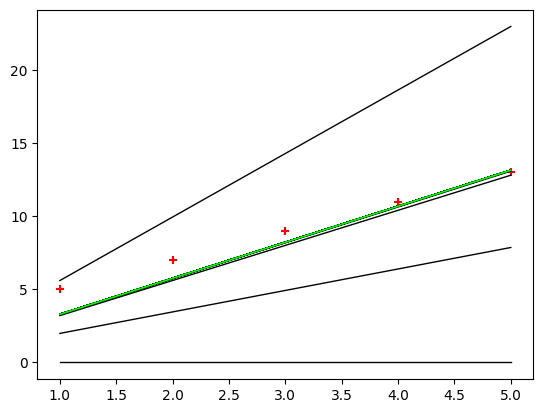

In [45]:
gradient_descent_changingrate(x,y,iteration=50,start_rate=0.07)

## Exerscise

m 1.9783600000000003, b 0.027960000000000002, cost 5199.1, iteration 0
m 0.20975041279999962, b 0.0030470367999999894, cost 4161.482445460163, iteration 1
m 1.7908456142986242, b 0.025401286955264, cost 3332.2237319269248, iteration 2
m 0.37738163667530467, b 0.005499731626422651, cost 2669.4843523161976, iteration 3
m 1.6409848166378898, b 0.023373894401807944, cost 2139.826383775145, iteration 4
m 0.5113514173939655, b 0.0074774305434828076, cost 1716.5264071567592, iteration 5
m 1.5212165764726306, b 0.021771129698498662, cost 1378.2272007804495, iteration 6
m 0.6184191426785134, b 0.009075514323270572, cost 1107.8601808918404, iteration 7
m 1.4254981563597626, b 0.020507724625171385, cost 891.7842215178443, iteration 8
m 0.7039868810749315, b 0.010370210797388455, cost 719.0974036421305, iteration 9
m 1.3490002310389348, b 0.01951553325074733, cost 581.0869686205, iteration 10
m 0.7723719384951477, b 0.01142244086408669, cost 470.7897237271261, iteration 11
m 1.2878632281408475, b 

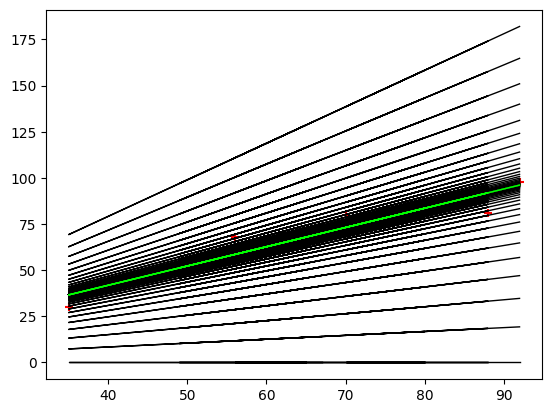

In [63]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import math

%matplotlib inline

def predict_using_sklean():
    df = pd.read_csv("test_scores.csv")
    r = LinearRegression()
    r.fit(df[['math']],df.cs)
    return r.coef_, r.intercept_

def gradient_descent_e(x,y,iterations,learning_rate):
    m_curr = 0
    b_curr = 0
    n = len(x)
    cost_previous = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)*sum([value**2 for value in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
        plt.plot(x,y_predicted,color=(0,1/(iterations-i),0),linewidth='1')
        print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))

    return m_curr, b_curr

if __name__ == "__main__":
    df = pd.read_csv("test_scores.csv")
    x = np.array(df.math)
    y = np.array(df.cs)

    plt.scatter(x,y,color='red',marker='+')

    m, b = gradient_descent_e(x,y,iterations=2000,learning_rate=0.0002)
    print("Using gradient descent function: Coef {} Intercept {}".format(m, b))

    m_sklearn, b_sklearn = predict_using_sklean()
    print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))